## Clone the Repository

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1021, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 1021 (delta 173), reused 205 (delta 132), pack-reused 738
Receiving objects: 100% (1021/1021), 9.72 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (671/671), done.


In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 KB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 KB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6

## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [ ]:
!curl -L "https://public.roboflow.com/ds/CNyGy97q45?key=eSpwiC1Ah7" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

## Create the Custom Dataset YAML File.

In [5]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: [
    '__background__',
    'fish', 'jellyfish', 'penguin', 
    'shark', 'puffin', 'stingray',
    'starfish'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 8

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

In [9]:
!wandb disabled

W&B disabled.


In [13]:
!python train.py --config data_configs/custom_data.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --project-name custom_training --batch-size 2 --no-mosaic

Not using distributed mode
device cuda
Creating data loaders
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Number of training samples: 448
Number of validation samples: 127

Building model from scratch...
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         --                        --
├─GeneralizedRCNNTransform: 1-1                    --                        --
├─BackboneWithFPN: 1-2                             [2, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1       

## Visualize Validation Results

In [14]:
import matplotlib.pyplot as plt
import glob as glob

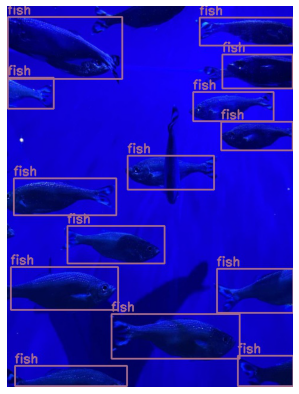

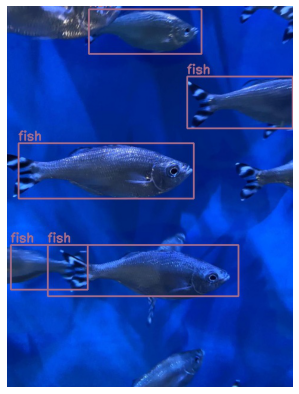

In [16]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Evaluation

In [17]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 16/16 [00:24<00:00,  1.50s/it]


{'map': tensor(0.3643),
 'map_50': tensor(0.6356),
 'map_75': tensor(0.3682),
 'map_large': tensor(0.4761),
 'map_medium': tensor(0.3621),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.1287),
 'mar_1': tensor(0.2092),
 'mar_10': tensor(0.4286),
 'mar_100': tensor(0.5073),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.6396),
 'mar_medium': tensor(0.5108),
 'mar_small': tensor(0.2216)}


In [18]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 16/16 [00:24<00:00,  1.52s/it]


{'map': tensor(0.3643),
 'map_50': tensor(0.6356),
 'map_75': tensor(0.3682),
 'map_large': tensor(0.4761),
 'map_medium': tensor(0.3621),
 'map_per_class': tensor([0.3955, 0.4231, 0.2327, 0.3783, 0.1713, 0.4232, 0.5259]),
 'map_small': tensor(0.1287),
 'mar_1': tensor(0.2092),
 'mar_10': tensor(0.4286),
 'mar_100': tensor(0.5073),
 'mar_100_per_class': tensor([0.5366, 0.5439, 0.4625, 0.5246, 0.3473, 0.5879, 0.5481]),
 'mar_large': tensor(0.6396),
 'mar_medium': tensor(0.5108),
 'mar